In [8]:
import pandas as pd
import numpy as np

from pycaret.classification import *

from sklearn.metrics import log_loss, f1_score

In [2]:
base_train = catalog.load("base_train")
base_train

[04/05/23 16:31:58] INFO     Loading data from 'base_train' (ParquetDataSet)...                 ]8;id=490373;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=363214;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
11476,34.0443,-118.2698,2,2,0,0,0.0
26552,34.0373,-118.3888,7,3,1,11,0.0
1209,34.0443,-118.2698,2,3,0,0,1.0
28269,34.0133,-118.4028,5,4,1,13,0.0
10504,34.0453,-118.1038,2,1,0,16,1.0
...,...,...,...,...,...,...,...
12390,34.0443,-118.2698,11,2,0,0,0.0
15071,33.9773,-118.4788,5,2,0,21,0.0
27609,33.9553,-118.2598,0,3,1,8,1.0
13,34.0403,-118.3638,2,1,0,9,0.0


In [3]:
base_test = catalog.load("base_test")
base_test

[04/05/23 16:32:00] INFO     Loading data from 'base_test' (ParquetDataSet)...                  ]8;id=836371;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=826823;file://D:\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
6494,34.0443,-118.2698,5,4,0,0,1.0
2113,34.0313,-118.3028,7,1,0,3,0.0
5061,34.0493,-118.1798,2,2,0,9,0.0
24559,33.9873,-118.3828,7,1,0,12,0.0
30414,34.0443,-118.2698,3,3,1,0,0.0
...,...,...,...,...,...,...,...
21484,33.9073,-118.1448,4,1,0,18,1.0
24648,34.0653,-118.3788,7,4,0,11,1.0
1260,34.0443,-118.2698,2,3,0,0,0.0
10221,33.9983,-118.2488,5,2,0,5,0.0


## Treinamento_RegLog

In [4]:
setup_de_classificacao = setup(data = base_train, target='shot_made_flag', session_id = 17042023 )

,Description,Value
0,Session id,17042023
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [5]:
lr_model = setup_de_classificacao.create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5827,0.6147,0.4759,0.5737,0.5202,0.1567,0.1589
1,0.5572,0.5622,0.4667,0.5396,0.5005,0.1066,0.1075
2,0.5915,0.6142,0.5037,0.5812,0.5397,0.1759,0.1774
3,0.6056,0.6220,0.4833,0.6070,0.5381,0.2017,0.2057
4,0.5607,0.5679,0.4722,0.5437,0.5055,0.1139,0.1148
5,0.5678,0.5899,0.4416,0.5561,0.4922,0.1245,0.1271
6,0.5590,0.5926,0.4638,0.5411,0.4995,0.1095,0.1105
7,0.5915,0.6142,0.4768,0.5854,0.5256,0.1735,0.1763
8,0.5713,0.5851,0.4712,0.5570,0.5106,0.1339,0.1354


In [6]:
type(lr_model)

sklearn.linear_model._logistic.LogisticRegression

In [7]:
lr_model_results = setup_de_classificacao.pull()
lr_model_results

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5827,0.6147,0.4759,0.5737,0.5202,0.1567,0.1589
1,0.5572,0.5622,0.4667,0.5396,0.5005,0.1066,0.1075
2,0.5915,0.6142,0.5037,0.5812,0.5397,0.1759,0.1774
3,0.6056,0.6220,0.4833,0.6070,0.5381,0.2017,0.2057
4,0.5607,0.5679,0.4722,0.5437,0.5055,0.1139,0.1148
5,0.5678,0.5899,0.4416,0.5561,0.4922,0.1245,0.1271
6,0.5590,0.5926,0.4638,0.5411,0.4995,0.1095,0.1105
7,0.5915,0.6142,0.4768,0.5854,0.5256,0.1735,0.1763
8,0.5713,0.5851,0.4712,0.5570,0.5106,0.1339,0.1354


In [9]:
pred_lr = predict_model(lr_model, base_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5748,0.5976,0.4770,0.5765,0.5220,0.1452,0.1474


In [10]:
f1 = f1_score(pred_lr[['shot_made_flag']], pred_lr[['prediction_label']])
f1

0.5220282626766417

In [12]:
pred2 = lr_model.predict_proba(base_test[['lat', 'lon', 'minutes_remaining', 'period', 'playoffs','shot_distance']])
pred3 = pd.DataFrame(pred2)
pred3

,0,1
0,0.424066,0.575934
1,0.427231,0.572769
2,0.514274,0.485726
3,0.528312,0.471688
4,0.419286,0.580714
...,...,...
4052,0.601449,0.398551
4053,0.543247,0.456753
4054,0.421878,0.578122
4055,0.462536,0.537464


In [13]:
lg = log_loss(pred_lr[['shot_made_flag']], pred3)
lg

0.6782247466428812

## Treinamento_Clf

In [14]:
setup_de_classificacao = setup(data = base_train, target='shot_made_flag', session_id = 17042023 )

,Description,Value
0,Session id,17042023
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [15]:
melhores_modelos = compare_models(n_select=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.5896,0.5932,0.3509,0.6208,0.4482,0.1597,0.1765,0.6790
gbc,Gradient Boosting Classifier,0.5887,0.5923,0.3765,0.6087,0.4650,0.1601,0.1724,0.6940
lr,Logistic Regression,0.5780,0.5959,0.4756,0.5667,0.5170,0.1473,0.1492,0.4550
lda,Linear Discriminant Analysis,0.5763,0.5965,0.4795,0.5637,0.5181,0.1444,0.1460,0.6510
ridge,Ridge Classifier,0.5761,0.0000,0.4788,0.5636,0.5176,0.1440,0.1456,0.5880
qda,Quadratic Discriminant Analysis,0.5761,0.5988,0.5264,0.5571,0.5412,0.1479,0.1481,0.5990
nb,Naive Bayes,0.5754,0.5925,0.4997,0.5597,0.5279,0.1443,0.1452,0.6320
lightgbm,Light Gradient Boosting Machine,0.5729,0.5897,0.4693,0.5601,0.5105,0.1369,0.1386,0.6430
rf,Random Forest Classifier,0.5618,0.5744,0.5196,0.5404,0.5297,0.1199,0.1200,0.7830
et,Extra Trees Classifier,0.5574,0.5648,0.5255,0.5347,0.5299,0.1118,0.1118,0.9110


In [16]:
melhores_modelos

[AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                    estimator=None, learning_rate=1.0, n_estimators=50,
                    random_state=17042023),
 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=17042023, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=1000,
                    multi_cl

In [17]:
ab_clf_model = melhores_modelos[0]
ab_clf_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=17042023)

In [18]:
type(ab_clf_model)

sklearn.ensemble._weight_boosting.AdaBoostClassifier

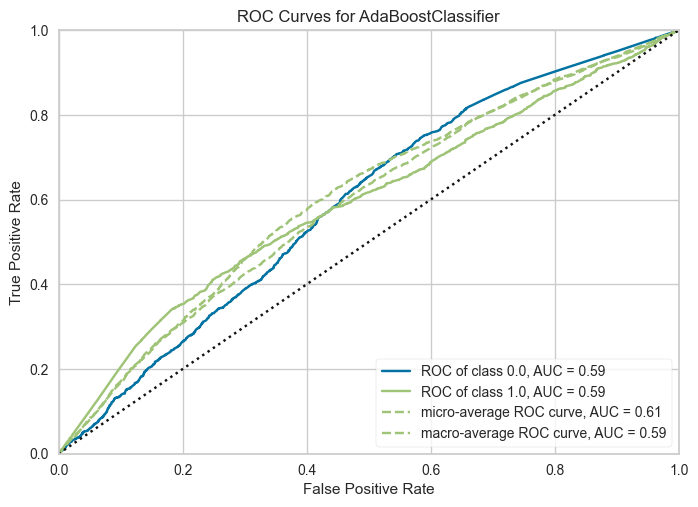

In [19]:
# plot_model(ab_clf_model_final)
plot_model(ab_clf_model)

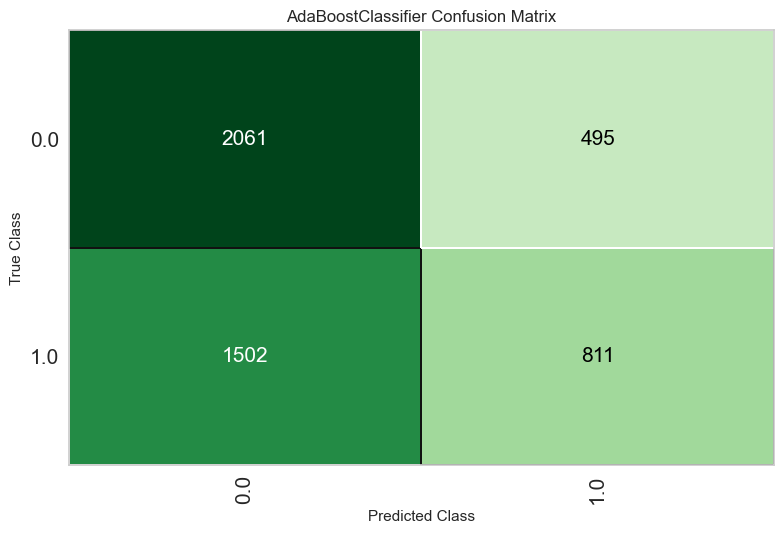

In [20]:
plot_model(ab_clf_model, plot='confusion_matrix')

In [21]:
pred_ab_clf = predict_model(ab_clf_model, base_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,str,0.5894,0.6024,0.3484,0.6448,0.4523,0.1683,0.1888


In [22]:
f1 = f1_score(pred_ab_clf[['shot_made_flag']], pred_ab_clf[['prediction_label']])
f1

0.4523339907955292

In [24]:
pred2 = ab_clf_model.predict_proba(base_test[['lat', 'lon', 'minutes_remaining', 'period', 'playoffs','shot_distance']])
pred3 = pd.DataFrame(pred2)
pred3

,0,1
0,0.497293,0.502707
1,0.501276,0.498724
2,0.501408,0.498592
3,0.500638,0.499362
4,0.497197,0.502803
...,...,...
4052,0.501564,0.498436
4053,0.503356,0.496644
4054,0.497197,0.502803
4055,0.500527,0.499473


In [25]:
lg = log_loss(pred_lr[['shot_made_flag']], pred3)
lg

0.6923222981897403